### Perceptron & Shallow Neuron

### Cristel 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random 
from random import *
from math import exp

### Problem 1

In [2]:
Movie_data = pd.read_csv("movieData.csv")
Movie_df = np.ones(Movie_data.shape[0])
Movie_data.insert(0,"Ones",Movie_df)
Movie_data

,Ones,LevelOfViolence,CriticsRating,Watched
0,1.0,1,1.2,-1
1,1.0,1,3.5,1
2,1.0,1,4.2,1
3,1.0,2,3.9,1
4,1.0,2,2.8,-1
5,1.0,3,3.0,-1
6,1.0,5,4.5,-1
7,1.0,4,1.8,-1
8,1.0,1,2.1,-1
9,1.0,3,4.8,1


In [3]:
Watched = Movie_data[Movie_data["Watched"] == 1]
Not_Watched = Movie_data[Movie_data["Watched"] == -1]

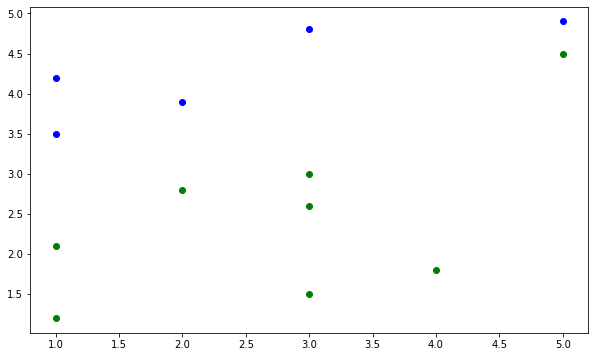

In [4]:
fig = plt.figure(figsize=(10,6))
plt.scatter(Watched.LevelOfViolence,Watched.CriticsRating ,color='blue')
plt.scatter(Not_Watched.LevelOfViolence,Not_Watched.CriticsRating ,color='green')
plt.show()

#### (a) Train a perceptron that will create a linear boundary decision that willhelp the company to make future recommendations to Ms. X. After how many iterations does the algorithm converge?

In [22]:
def perceptron(Data, Labels, lr, Number_Of_Iterations):
    
    # Data --> Inputs
    # Labels --> labels/target
    # lr --> Learning Rate
    # Number Of Iteration --> Epochs
    
    A,B = Data.shape
    
    
    # Initializing parapeters(theta) to zeros.
    # +1 in n+1 for the bias term.
    
    Theta = np.zeros((B, 1))
    
    # Empty list to store how many examples were 
    # misclassified at every iteration.
    
    n_miss_list = []
    
    # Training

    for epoch in range(Number_Of_Iterations):
        
        # variable to store #misclassified.
        n_miss = 0
        
        for i, x in enumerate(Data):
            #print(np.dot(Data[i], Theta))
            t = np.dot(Data[i], Theta)
            k = 1.0 if (t > 0) else -1.0
            
            if (Labels[i] - k) != 0:
                n_miss += 1
                
                Theta = Theta + (Data[i] * Labels[i]).reshape(3,1)
                
                
                
        n_miss_list.append(n_miss)
        
        plt.plot(n_miss_list)
        plt.xlabel('Epoch')
        plt.ylabel('Total Loss')
        
        
    
        
    return Theta, n_miss_list

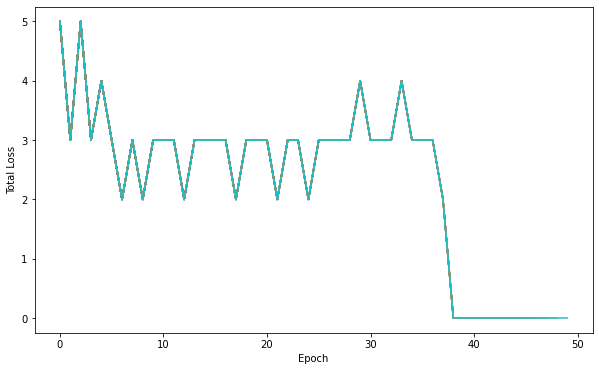

In [20]:
fig = plt.figure(figsize=(10,6))
Weights, Values = perceptron(Movie_data.iloc[:, :-1].values, Movie_data.iloc[:, -1].values, 1, 50)

In [7]:
print(Weights)

[[-28. ]
 [ -9. ]
 [ 15.2]]


In [35]:
print('The algorithm becomes stable on epoch', Values.index(0) + 1, 'as the value becomes 0')

The algorithm becomes stable on epoch 39 as the value becomes 0


In [8]:
Slope = -Weights[1][0] / Weights[2][0]
Intercept = -Weights[0][0] / Weights[2][0]
print("The slope is:", Slope)
print('The intercept is:', Intercept)

The slope is: 0.5921052631578945
The intercept is: 1.842105263157894


#### (b) Upon creating a model, plot the boundary line along with all the datapoints and axes clearly marked.

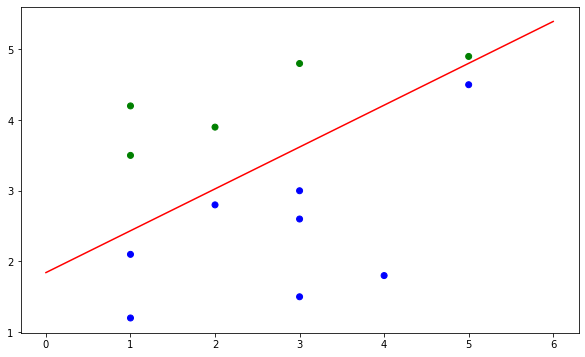

In [9]:
xvalue = np.linspace(0,6)
abline_values = [(Slope  * i) + Intercept for i in xvalue]
fig = plt.figure(figsize=(10,6))
colors=['blue','green']
label=Movie_data['Watched']
plt.scatter(Movie_data['LevelOfViolence'],  Movie_data['CriticsRating'],c=label, cmap=matplotlib.colors.ListedColormap(colors))
plt.plot(xvalue, abline_values, 'red')  
plt.show()

### Problem 2

In [27]:
Co_df = pd.read_csv("siCoData.csv")
Co_df.head()

,x,y
0,-0.889238,-0.334713
1,0.532539,0.898156
2,0.596540,0.870667
3,-0.375349,-0.713875
4,0.083465,0.401115


#### (a)

In [11]:
#### Converting the data into a matrix
CoData_df = np.matrix(Co_df)

In [12]:
def tanh_derivative(num):
    return (1.0 - np.power(np.tanh(num), 2))

In [13]:
def Activation(Data, epochs):
    
    X = Data[:, :-1]
    Y = Data[:, -1]
    
    # Generating random weights
    W_0_1 = np.random.normal(size=(2, 2))
    W_1_2 = np.random.normal(size=(3, 1))
    Old_W_1_2 = W_1_2
    
    yhat = []
    listoferror = []
    for j in range(epochs):
        epocherror = 0
        Prediction = []
        for i in range(len(X)):
            # Forward Pass
            X_val = np.insert(X[i], 0, 1) 
            Hidden_Init = np.dot(X_val, W_0_1) 
            Temp = np.tanh(Hidden_Init)
            Temp = np.insert(Temp, 0, 1) 
            Hidden_Output = np.dot(Temp, W_1_2) 
            
            Error = (Hidden_Output - Y[i])**2
            
            # Back Propogation
            # Output --> hidden layer
            D1 = (2*(Hidden_Output - Y[i])).item(0,0) 
            D2 = (tanh_derivative(Hidden_Output)).item(0,0) 
            D3 = Temp.reshape(3,1)
            D3[0][0] = 0 
            Total_Delta = D1*D2*D3
            
            W_1_2 = W_1_2 - Total_Delta*0.1
            
            D3 = Old_W_1_2[1][0]
            D4 = tanh_derivative(Hidden_Init.item(0,0))
            D5 = X_val
            Total_Delta_1 = D1*D2*D3*D4*D5
            W_0_1 = W_0_1.T

            W_0_1[0] = W_0_1[0] - Total_Delta_1*0.1
            
            D3 = Old_W_1_2[2][0]
            D4 = tanh_derivative(Hidden_Init.item(0,1))
            D5 = X_val
            Total_Delta_2 = D1*D2*D3*D4*D5
            
            W_0_1[1] = W_0_1[1] - Total_Delta_2*0.1
            
            W_0_1 = W_0_1.T
            Old_W_1_2 = W_1_2
            
            epocherror += Error
            Prediction.append(Hidden_Output)
            
        yhat.append(Prediction)
        listoferror.append(epocherror/250)
            
    return yhat, listoferror

In [14]:
Data, err = Activation(CoData_df, 300)

#### (b)

#### Plotting the orignal data

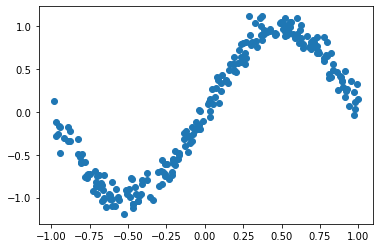

In [15]:
plt.scatter(Co_df.x, Co_df.y)

#### Plotting the predicted values

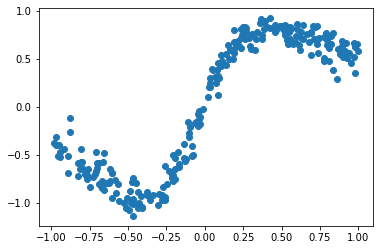

In [16]:
plt.scatter(Co_df.x, Data[np.argmin(err)])
plt.show()